In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('realtor-data.csv')
df.head()


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [143]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,174249.000000,175136.000000,153569.000000,205805.000000,1.757230e+05,2.060000e+05
mean,3.531383,2.622431,8.618086,2165.771808,2.233759e+03,8.729601e+05
std,2.688206,2.929336,629.443554,1731.612917,4.198274e+03,1.448204e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.130000,1235.000000,1.152000e+03,2.499000e+05
50%,3.000000,2.000000,0.340000,2038.000000,1.728000e+03,5.249000e+05
75%,4.000000,3.000000,1.140000,2191.000000,2.634000e+03,8.900000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [144]:
print(df.state.nunique())
df.state.value_counts()

12


Massachusetts     153666
Puerto Rico        24679
Connecticut        12207
Rhode Island        4907
New Hampshire       4721
Virgin Islands      2573
New York            1874
Vermont             1324
South Carolina        24
Tennessee             18
Virginia               5
New Jersey             2
Name: state, dtype: int64

Massachusetts has the most robust amount of data so I will focus on Massachusetts for this analysis.

In [145]:
mass = df.loc[df['state'] == 'Massachusetts']

In [146]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,131670.000000,132309.000000,110714.000000,153654.000000,133166.000000,1.536660e+05
mean,3.522101,2.693301,4.095155,1863.680828,2281.302367,1.013823e+06
std,2.959423,3.282514,76.854123,466.956594,2540.372190,1.478948e+06
min,1.000000,1.000000,0.000000,1001.000000,104.000000,1.000000e+00
25%,2.000000,2.000000,0.140000,1507.000000,1170.000000,3.650000e+05
50%,3.000000,2.000000,0.330000,2050.000000,1768.000000,6.290000e+05
75%,4.000000,3.000000,1.070000,2143.000000,2709.000000,9.990000e+05
max,99.000000,198.000000,9035.000000,2893.000000,99999.000000,3.000000e+07


I am going to look at catigorical variables first and delete outliers from dataset

<Figure size 800x600 with 0 Axes>

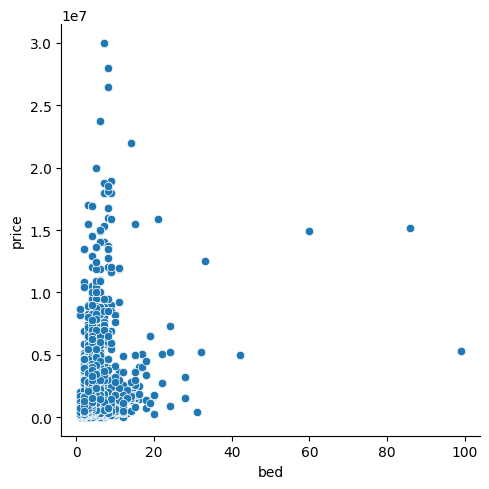

In [147]:
# cont_variables = ['bed', 'bath', 'acre_lot', 'house_size']

# for i in range(len(cont_variables)):
#     sns.displot(data=mass, x=cont_variables[i], y='price')

plt.figure(figsize=(8,6))
sns.relplot(data=mass, x='bed', y='price')

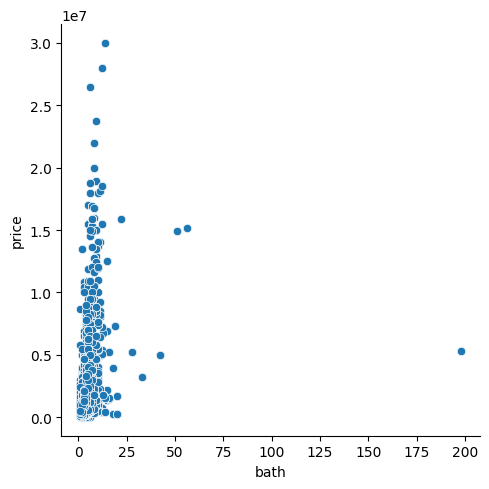

In [148]:
sns.relplot(data=mass, x='bath', y='price')

In [149]:
print(mass.bed.loc[mass['bed'] > 10].count() / mass.bed.count())


0.01820460241512873


Deleting listings with greater than 10 bedrooms will only get rid of 1.8% of the mass dataset

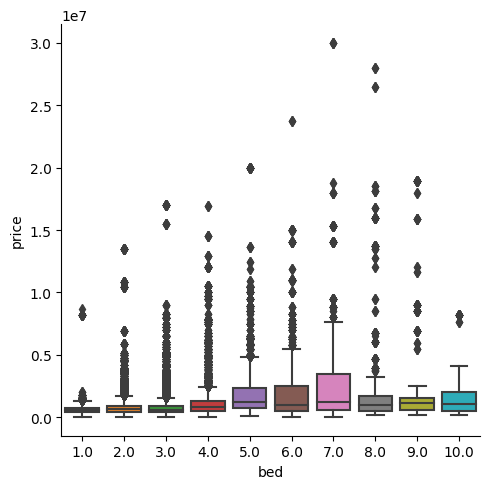

In [150]:
mass = mass.loc[mass['bed'] <= 10]

# mass.head()
sns.catplot(data=mass, x='bed', y='price', kind='box')

Deleting listings with greater than 8 bathrooms will only get rid of 1.3% of the mass dataset

In [151]:
print(mass.bath.loc[mass['bath'] > 8].count() / mass.bath.count())

0.007661613372432193


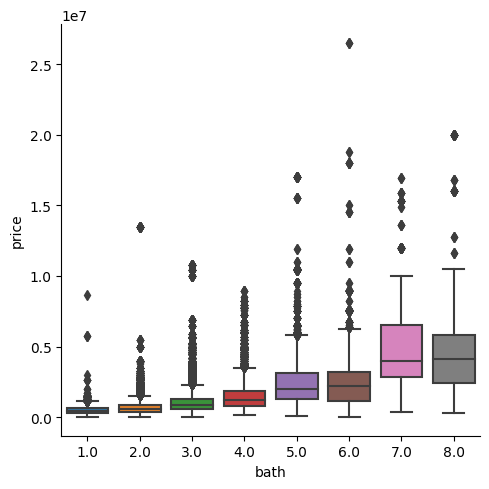

In [152]:
mass = mass.loc[mass['bath'] <= 8]

# mass.head()
sns.catplot(data=mass, x='bath', y='price', kind='box')

In [153]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,127578.000000,127578.000000,86327.000000,127578.000000,127488.000000,1.275780e+05
mean,3.254934,2.507047,2.682794,1919.926994,2122.689900,1.036909e+06
std,1.623788,1.318937,85.998240,439.198461,1819.318457,1.297272e+06
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,2.000000,2.000000,0.120000,1605.000000,1170.000000,4.450000e+05
50%,3.000000,2.000000,0.250000,2111.000000,1741.000000,6.790000e+05
75%,4.000000,3.000000,0.650000,2148.000000,2600.000000,1.069000e+06
max,10.000000,8.000000,9035.000000,2893.000000,99999.000000,2.650000e+07


Need to visualize continuous variables and delete outliers from dataset

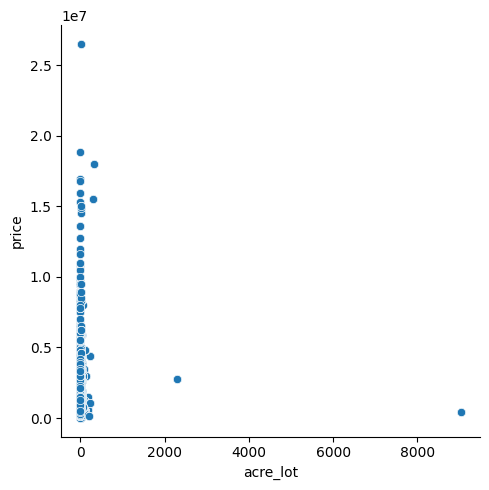

In [154]:
sns.relplot(data=mass, x='acre_lot', y='price')

Big outliers in acre_lot so I am going to delete rows with acre_lot > 150

In [155]:
print(mass.acre_lot.loc[mass['acre_lot'] > 150].count() / mass.acre_lot.count())

0.0014711503932720933


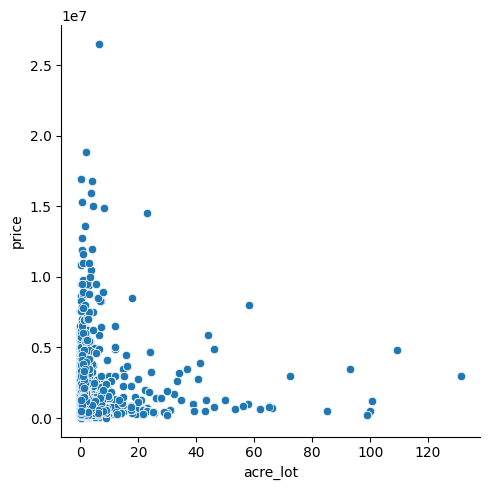

In [156]:
mass = mass.loc[mass['acre_lot'] <= 150]

sns.relplot(data=mass, x='acre_lot', y='price')

In [157]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,86200.000000,86200.000000,86200.000000,86200.000000,86119.000000,8.620000e+04
mean,3.767564,2.693445,1.096451,1862.135754,2404.790244,9.674267e+05
std,1.642856,1.395270,4.879141,472.483197,1489.709849,1.121362e+06
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,3.000000,2.000000,0.120000,1520.000000,1390.000000,4.250000e+05
50%,3.000000,2.000000,0.250000,1930.000000,2032.000000,6.499000e+05
75%,4.000000,3.000000,0.650000,2149.000000,2992.000000,9.999000e+05
max,10.000000,8.000000,131.340000,2893.000000,14240.000000,2.650000e+07


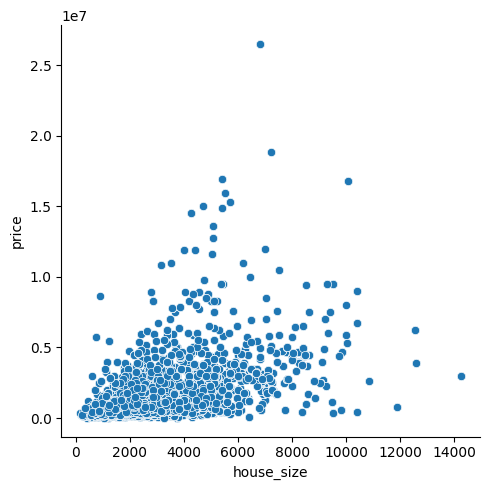

In [158]:
sns.relplot(data=mass, x='house_size', y='price')

In [159]:
print(mass.house_size.loc[mass['house_size'] > 6000].count() / mass.house_size.count())

0.03030690091617413


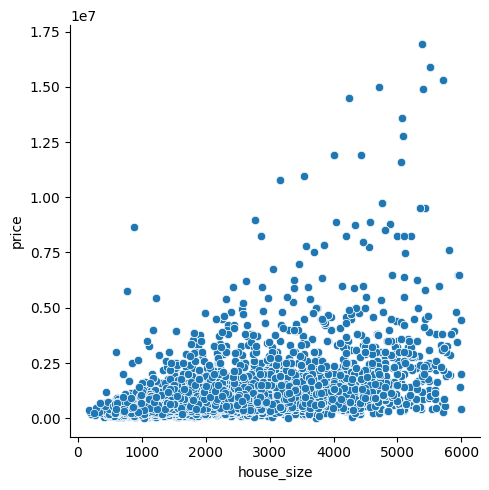

In [160]:
mass = mass.loc[mass['house_size'] <= 6000]

sns.relplot(data=mass, x='house_size', y='price')

In [161]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,83509.000000,83509.000000,83509.000000,83509.000000,83509.000000,8.350900e+04
mean,3.703481,2.573615,1.023101,1855.973679,2238.332862,8.808538e+05
std,1.611422,1.223760,4.755558,469.949952,1140.921472,9.437702e+05
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,3.000000,2.000000,0.120000,1518.000000,1369.000000,4.200000e+05
50%,3.000000,2.000000,0.240000,1921.000000,1988.000000,6.390000e+05
75%,4.000000,3.000000,0.600000,2148.000000,2870.000000,9.500000e+05
max,10.000000,8.000000,131.340000,2893.000000,6000.000000,1.695000e+07


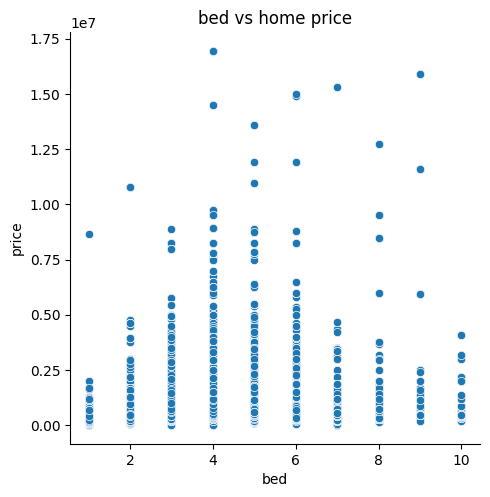

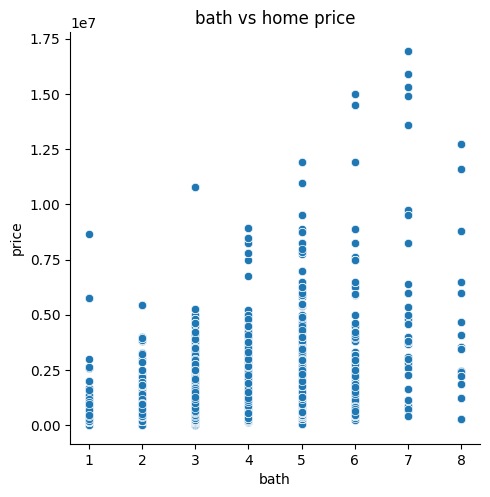

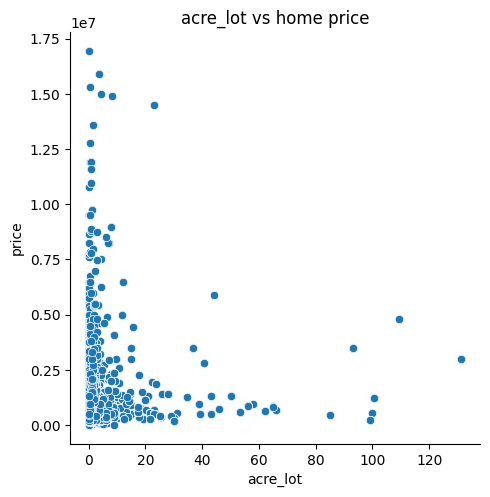

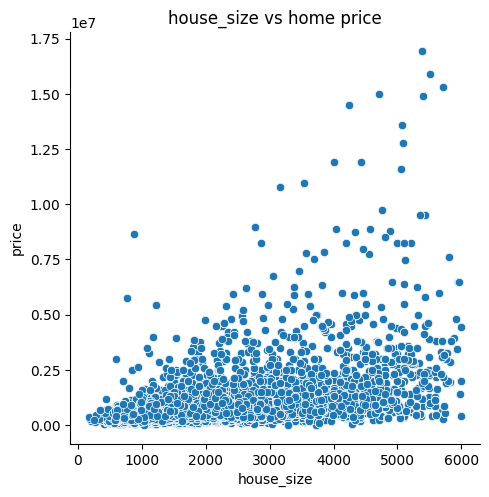

In [162]:
cont_variables = ['bed', 'bath', 'acre_lot', 'house_size']

for variable in cont_variables:
    sns.relplot(data=mass, x=variable, y='price')
    plt.title(variable + ' vs home price')
    plt.plot()

In [163]:
mass = mass.drop(columns=['zip_code', 'status', 'city', 'state', 'prev_sold_date'])
mass.head()

,bed,bath,acre_lot,house_size,price
24231,2.0,1.0,0.34,676.0,180000.0
24236,3.0,1.0,0.46,1196.0,239900.0
24237,3.0,3.0,0.45,2314.0,525000.0
24238,3.0,2.0,0.36,1276.0,289900.0
24241,4.0,2.0,0.11,1732.0,275000.0


In [164]:
mass['bed'].fillna(df['bed'].mode()[0], inplace=True)
mass['bath'].fillna(df['bath'].mode()[0], inplace=True)
mass['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
mass['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

mass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83509 entries, 24231 to 205999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bed         83509 non-null  float64
 1   bath        83509 non-null  float64
 2   acre_lot    83509 non-null  float64
 3   house_size  83509 non-null  float64
 4   price       83509 non-null  float64
dtypes: float64(5)
memory usage: 5.8 MB


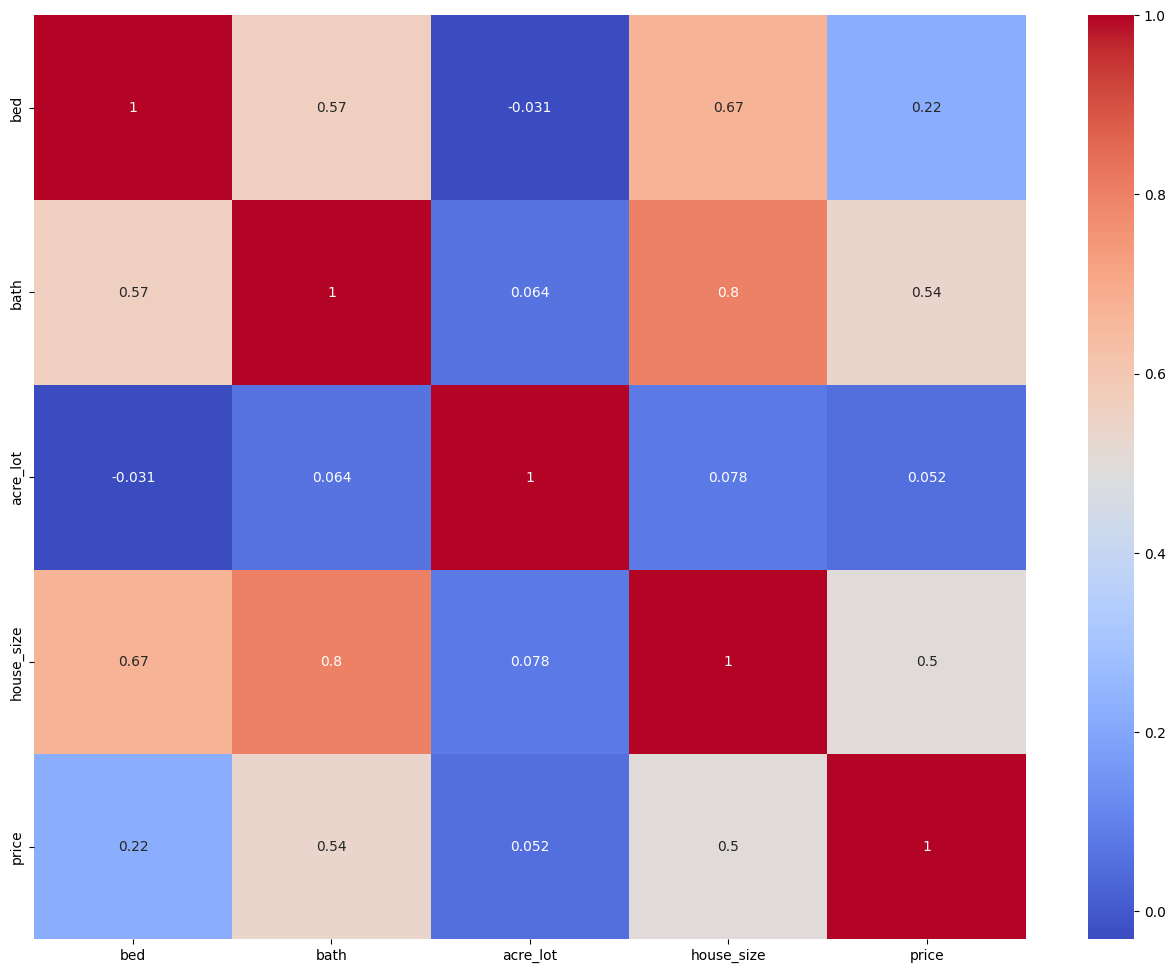

In [165]:
correlations = mass.corr(method='pearson')
plt.figure(figsize=(16,12))
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = mass[['bed', 'bath', 'acre_lot', 'house_size']]
y = mass['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=28)

model = LinearRegression()

model.fit(xtrain, ytrain)

LinearRegression()

In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_predict = model.predict(xtest)

mse = mean_squared_error(ytest, y_predict)
mae = mean_absolute_error(ytest, y_predict)
r2 = r2_score(ytest, y_predict)

print(mse, mae, r2)

657767236166.6556 423977.106161151 0.324634634790096


R^2 is only 0.32 and Mean Absolute Error is ~$425k. Model is quite inaccurate. Possible reasons for the inaccuracy is due to lack of features. It may be beneficial to include zipcode and/or city in model. Location may have a significant impact on home prices. 

This can be achieved by using the dummy variables for cities and zipcodes